In [1]:
from google.colab import drive
drive.mount('/content/drive')

KeyboardInterrupt: ignored

In [2]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
%matplotlib inline


In [3]:
from keras.layers import Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.optimizers import Adagrad
from keras.callbacks import EarlyStopping
from keras.regularizers import l2
from keras.models import Sequential

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [4]:
#load training dataset as dataframe
df = pd.read_csv('Train_data.csv')

In [5]:
#preprocessing and data cleaning
df.shape #42 attributes and 25192 packets/records

(25192, 42)

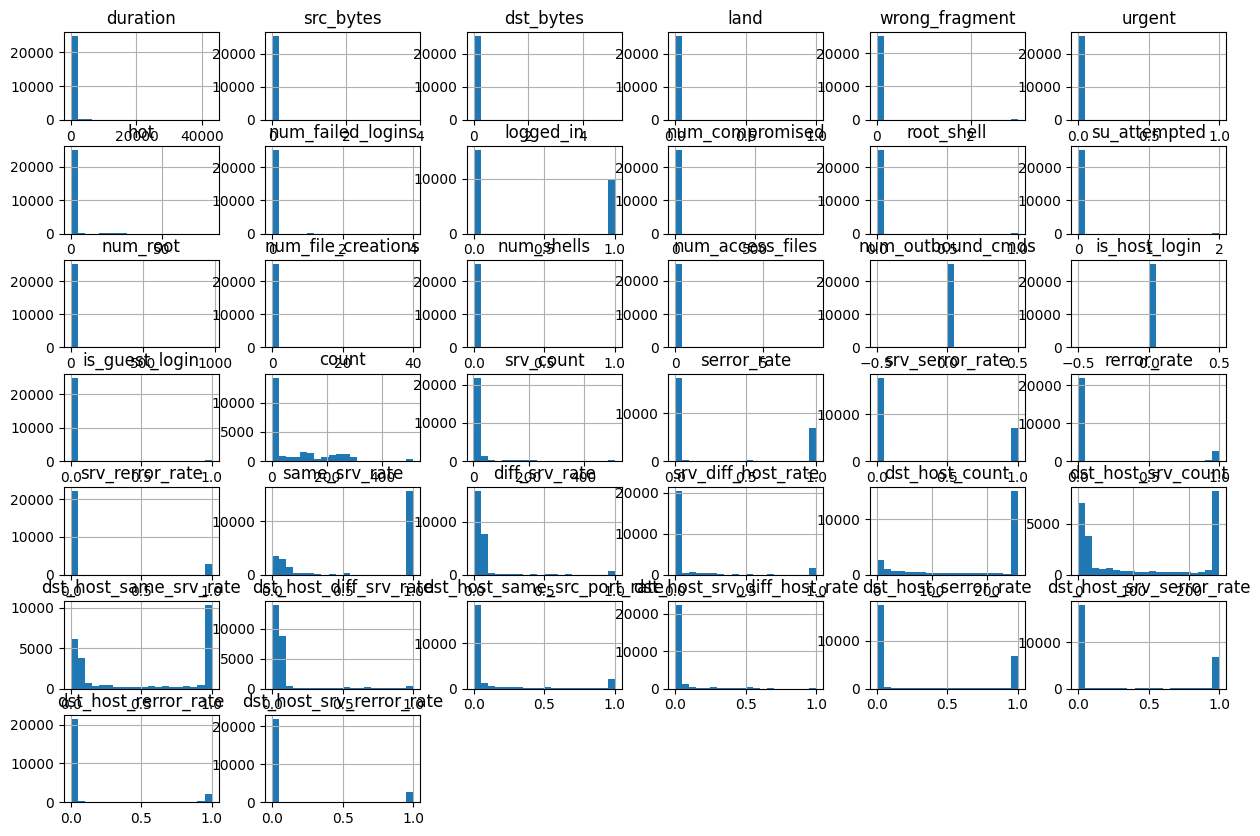

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame
numeric_attributes = df.select_dtypes(include=['float64', 'int64'])
numeric_attributes.hist(bins=20, figsize=(15, 10))
plt.show()

<ipython-input-7-4add57d0b71a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


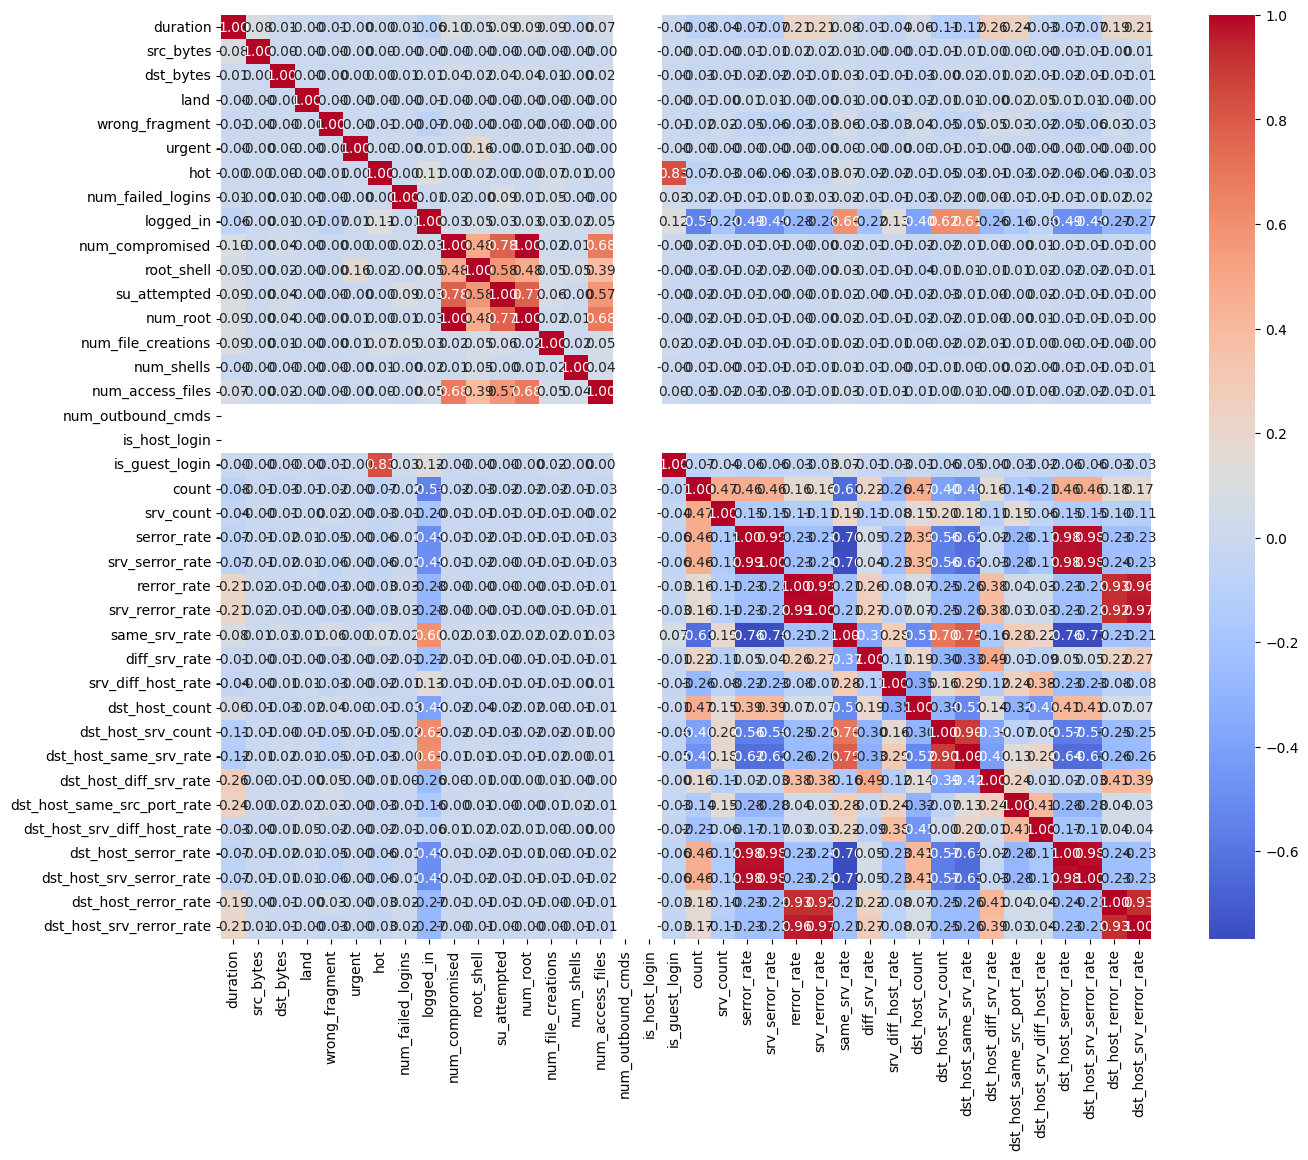

In [7]:
correlation_matrix = df.corr()
plt.figure(figsize=(15, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


In [ ]:
sns.pairplot(df, hue='class', palette='husl')
plt.show()

In [ ]:
df.isna().sum() #null values in each column

duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [ ]:
df.duplicated().sum() #duplicates

0

In [ ]:
df.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

As 4 columns are of object datatype, we are going to label them with numbers/integers.


In [ ]:
df['flag'].unique().shape #11 unique flag values

(11,)

In [ ]:
df['protocol_type'].unique().shape #three protocols namely tcp,udp and icmp

(3,)

In [ ]:
df['service'].unique().shape

(66,)

In [ ]:
df['class'].unique().shape #two labels, anomaly and normal

(2,)

In [ ]:
encoder = LabelEncoder() #encoding all object type attributes with integers
cols_label_encoder = ['service', 'flag', 'class', 'protocol_type']
for col in cols_label_encoder:
    df[col] = encoder.fit_transform(df[col])

In [ ]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
0,0,1,19,9,491,0,0,0,0,0,...,25,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,1
1,0,2,41,9,146,0,0,0,0,0,...,1,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,1
2,0,1,46,5,0,0,0,0,0,0,...,26,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,0
3,0,1,22,9,232,8153,0,0,0,0,...,255,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,1
4,0,1,22,9,199,420,0,0,0,0,...,255,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1


In [ ]:
df.dtypes

duration                         int64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

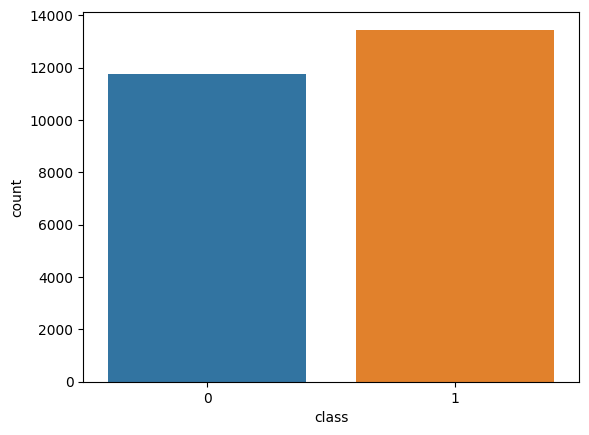

In [ ]:
sns.countplot(x=df['class'], data=df) #checking whether the distribution of data items is close or not(if expanding the dataset is needed)
plt.show()

In [ ]:
X = df.drop(labels='class', axis=1) #splitting the main training data into test and train data so as to get accuracy measures
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8,test_size=0.2, random_state=4)

In [ ]:
df.to_csv('processed_train.csv', index=False)
from google.colab import files
files.download('processed_train.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Epoch 1/50
252/252 [==============================] - 6s 8ms/step - loss: 2.5583 - accuracy: 0.8327 - val_loss: 2.3835 - val_accuracy: 0.9075
Epoch 2/50
252/252 [==============================] - 2s 8ms/step - loss: 2.3122 - accuracy: 0.9093 - val_loss: 2.2520 - val_accuracy: 0.9142
Epoch 3/50
252/252 [==============================] - 1s 3ms/step - loss: 2.2092 - accuracy: 0.9222 - val_loss: 2.1648 - val_accuracy: 0.9303
Epoch 4/50
252/252 [==============================] - 1s 3ms/step - loss: 2.1284 - accuracy: 0.9328 - val_loss: 2.0914 - val_accuracy: 0.9405
Epoch 5/50
252/252 [==============================] - 1s 3ms/step - loss: 2.0593 - accuracy: 0.9431 - val_loss: 2.0272 - val_accuracy: 0.9474
Epoch 6/50
252/252 [==============================] - 1s 3ms/step - loss: 1.9985 - accuracy: 0.9503 - val_loss: 1.9685 - val_accuracy: 0.9514
Epoch 7/50
252/252 [==============================] - 1s 3ms/step - loss: 1.9406 - accuracy: 0.9567 - val_loss: 1.9138 - val_accuracy: 0.9531
Epoch 

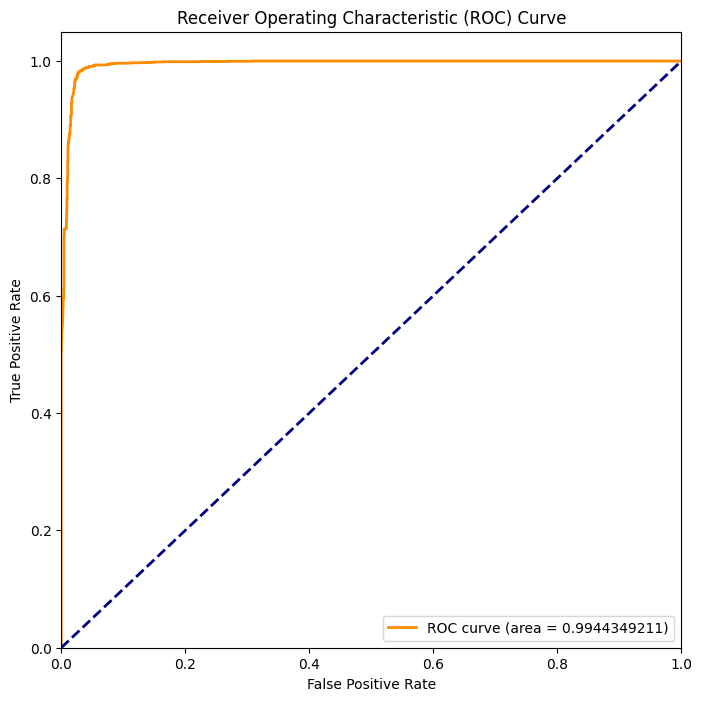

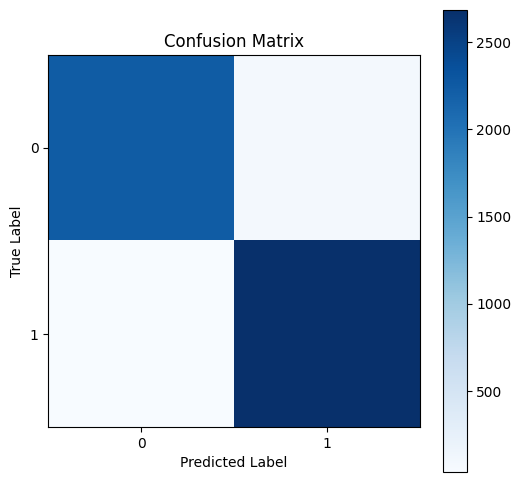

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adagrad
from keras.regularizers import l2
from keras.callbacks import TensorBoard
from sklearn.metrics import precision_score, recall_score, mean_squared_error, mean_absolute_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming you have your data (X_train, y_train) ready

input_shape = (41,)

model = Sequential([
    Dense(128, input_shape=input_shape),
    Activation('sigmoid'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('relu'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('relu'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('relu'),
    Dropout(0.25),
    Dense(1),
    Activation('sigmoid')
])

model.compile(Adagrad(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Set up TensorBoard for visualization
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=False)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, callbacks=[tensorboard])


from sklearn.metrics import confusion_matrix, roc_curve, auc, f1_score

# Evaluate the model on the test set
score = model.evaluate(X_test, y_test)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Handle NaN values in predictions
y_pred = np.nan_to_num(y_pred, nan=0)

# Convert predictions to binary (0 or 1) based on a threshold (e.g., 0.5)
threshold = 0.5
y_pred_binary = np.round(y_pred)

# Additional performance metrics
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
specificity = confusion_matrix(y_test, y_pred_binary)[0, 0] / (confusion_matrix(y_test, y_pred_binary)[0, 0] + confusion_matrix(y_test, y_pred_binary)[0, 1])
f1 = f1_score(y_test, y_pred_binary)
false_positive_rate = confusion_matrix(y_test, y_pred_binary)[0, 1] / (confusion_matrix(y_test, y_pred_binary)[0, 1] + confusion_matrix(y_test, y_pred_binary)[1, 1])

print("Test Loss:", score[0])
print("Test Accuracy:", score[1])
print("Precision:", precision)
print("Recall:", recall)
print("Specificity:", specificity)
print("F1 Score:", f1)
print("False Positive Rate:", false_positive_rate)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = {:.10f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred_binary)

plt.figure(figsize=(6, 6))
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['0', '1'])
plt.yticks([0, 1], ['0', '1'])
plt.show()



In [ ]:
model.summary()

In [ ]:
model.save('/content/drive/My Drive/Final year project/models/model.keras')

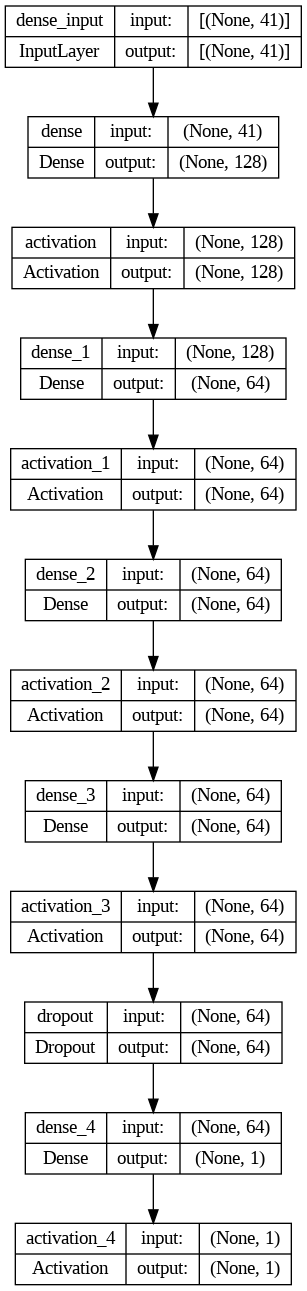

In [ ]:
from keras.utils import plot_model
plot_model(model, to_file='/content/drive/My Drive/Final year project/models/model architectures/model.png', show_shapes=True, show_layer_names=True)

In [ ]:
input_shape = (41,)

model1 = Sequential([
    Dense(128, input_shape=input_shape),
    Activation('relu'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('relu'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('sigmoid'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('relu'),
    Dropout(0.35),
    Dense(1),
    Activation('sigmoid')
])

model1.compile(Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Define callbacks for visualizations and early stopping
checkpoint = ModelCheckpoint("best_model.h5", save_best_only=True)
early_stopping = EarlyStopping(monitor="val_loss", patience=10)

# Train the model with callbacks
history = model1.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[checkpoint, early_stopping])

# Visualize training history
plt.figure(figsize=(12, 6))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

NameError: ignored

In [ ]:
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               5376      
                                                                 
 activation_5 (Activation)   (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 64)                8256      
                                                                 
 activation_6 (Activation)   (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 activation_7 (Activation)   (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 64)               

In [ ]:
history1 = model1.fit(X_train, y_train, batch_size=32, epochs=20, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/20
630/630 [==============================] - 4s 4ms/step - loss: 0.7869 - accuracy: 0.9435 - val_loss: 0.3468 - val_accuracy: 0.9617
Epoch 2/20
630/630 [==============================] - 2s 3ms/step - loss: 0.2866 - accuracy: 0.9546 - val_loss: 0.2434 - val_accuracy: 0.9633
Epoch 3/20
630/630 [==============================] - 2s 3ms/step - loss: 0.2162 - accuracy: 0.9558 - val_loss: 0.2159 - val_accuracy: 0.9530
Epoch 4/20
630/630 [==============================] - 2s 3ms/step - loss: 0.1854 - accuracy: 0.9562 - val_loss: 0.1570 - val_accuracy: 0.9647
Epoch 5/20
630/630 [==============================] - 2s 4ms/step - loss: 0.1589 - accuracy: 0.9608 - val_loss: 0.1499 - val_accuracy: 0.9621
Epoch 6/20
630/630 [==============================] - 3s 5ms/step - loss: 0.1445 - accuracy: 0.9619 - val_loss: 0.1412 - val_accuracy: 0.9625
Epoch 7/20
630/630 [==============================] - 2s 3ms/step - loss: 0.1364 - accuracy: 0.9644 - val_loss: 0.1296 - val_accuracy: 0.9637
Epoch 

In [ ]:
model1.save('/content/drive/My Drive/Final year project/models/model1.keras')

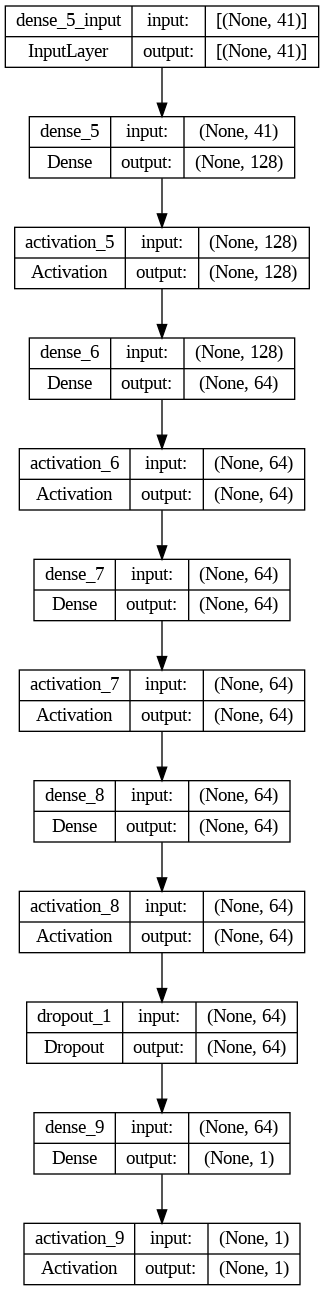

In [ ]:
plot_model(model1, to_file='/content/drive/My Drive/Final year project/models/model architectures/model1.png', show_shapes=True, show_layer_names=True)

In [ ]:
history2 = model1.fit(X_train, y_train, batch_size=15, epochs=20, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/20
1344/1344 [==============================] - 3s 2ms/step - loss: 0.0489 - accuracy: 0.9926 - val_loss: 0.1012 - val_accuracy: 0.9835
Epoch 2/20
1344/1344 [==============================] - 3s 3ms/step - loss: 0.0561 - accuracy: 0.9895 - val_loss: 0.0736 - val_accuracy: 0.9861
Epoch 3/20
1344/1344 [==============================] - 4s 3ms/step - loss: 0.0553 - accuracy: 0.9892 - val_loss: 0.0530 - val_accuracy: 0.9899
Epoch 4/20
1344/1344 [==============================] - 4s 3ms/step - loss: 0.0545 - accuracy: 0.9906 - val_loss: 0.0579 - val_accuracy: 0.9885
Epoch 5/20
1344/1344 [==============================] - 3s 3ms/step - loss: 0.0550 - accuracy: 0.9902 - val_loss: 0.0503 - val_accuracy: 0.9913
Epoch 6/20
1344/1344 [==============================] - 4s 3ms/step - loss: 0.0514 - accuracy: 0.9910 - val_loss: 0.0580 - val_accuracy: 0.9897
Epoch 7/20
1344/1344 [==============================] - 4s 3ms/step - loss: 0.0610 - accuracy: 0.9872 - val_loss: 0.0784 - val_accuracy:

In [ ]:
input_shape = (41,)

model3 = Sequential([
    Dense(128, input_shape=input_shape),
    Activation('relu'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('sigmoid'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('sigmoid'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('relu'),
    Dense(64, kernel_regularizer=l2(0.01)),
    Activation('relu'),
    Dropout(0.35),
    Dense(1),
    Activation('sigmoid')
])

model3.compile(Adagrad(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               5376      
                                                                 
 activation_10 (Activation)  (None, 128)               0         
                                                                 
 dense_11 (Dense)            (None, 64)                8256      
                                                                 
 activation_11 (Activation)  (None, 64)                0         
                                                                 
 dense_12 (Dense)            (None, 64)                4160      
                                                                 
 activation_12 (Activation)  (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 64)               

In [ ]:
history3 = model3.fit(X_train, y_train, batch_size=15, epochs=20, validation_data=(X_test, y_test), callbacks=[EarlyStopping(patience=3)])

Epoch 1/20
1344/1344 [==============================] - 5s 3ms/step - loss: 3.1013 - accuracy: 0.8256 - val_loss: 2.7713 - val_accuracy: 0.9129
Epoch 2/20
1344/1344 [==============================] - 4s 3ms/step - loss: 2.5581 - accuracy: 0.9118 - val_loss: 2.3416 - val_accuracy: 0.9264
Epoch 3/20
1344/1344 [==============================] - 5s 4ms/step - loss: 2.2186 - accuracy: 0.9261 - val_loss: 2.0619 - val_accuracy: 0.9454
Epoch 4/20
1344/1344 [==============================] - 4s 3ms/step - loss: 1.9734 - accuracy: 0.9362 - val_loss: 1.8461 - val_accuracy: 0.9512
Epoch 5/20
1344/1344 [==============================] - 4s 3ms/step - loss: 1.7782 - accuracy: 0.9436 - val_loss: 1.6721 - val_accuracy: 0.9538
Epoch 6/20
1344/1344 [==============================] - 5s 4ms/step - loss: 1.6167 - accuracy: 0.9460 - val_loss: 1.5251 - val_accuracy: 0.9546
Epoch 7/20
1344/1344 [==============================] - 4s 3ms/step - loss: 1.4790 - accuracy: 0.9499 - val_loss: 1.4009 - val_accuracy:

In [ ]:
model3.save('/content/drive/My Drive/Final year project/models/model3.keras')

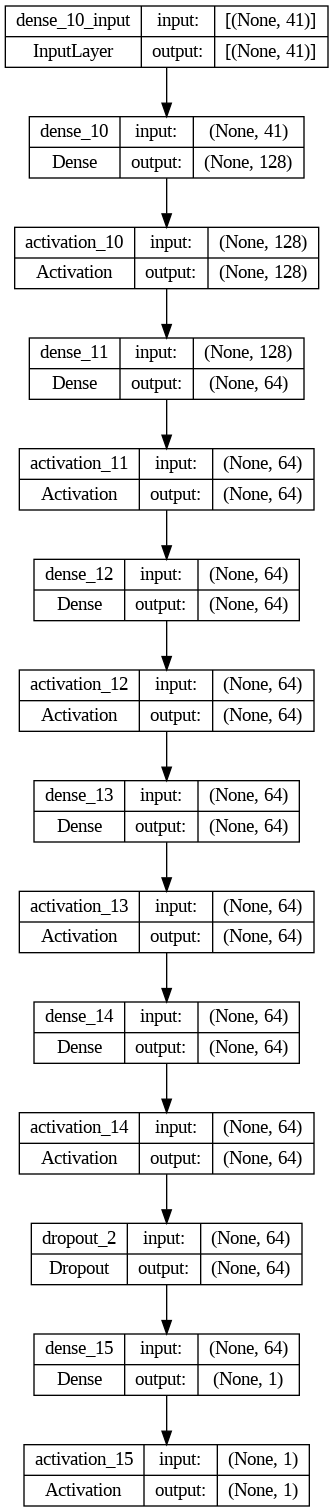

In [ ]:
plot_model(model3, to_file='/content/drive/My Drive/Final year project/models/model architectures/model.png', show_shapes=True, show_layer_names=True)